# Optimization - Maximize Number of Passengers

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective-Function-Creation-using-Ordinary-Least-Square-Regression-(OLS-R)-method" data-toc-modified-id="Objective-Function-Creation-using-Ordinary-Least-Square-Regression-(OLS-R)-method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective Function Creation using Ordinary Least Square Regression (OLS-R) method</a></span></li><li><span><a href="#Objective-Function" data-toc-modified-id="Objective-Function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objective Function</a></span></li><li><span><a href="#Integer-Programming-in-PuLP" data-toc-modified-id="Integer-Programming-in-PuLP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Integer Programming in PuLP</a></span></li><li><span><a href="#Simulated-annealing" data-toc-modified-id="Simulated-annealing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simulated annealing</a></span></li><li><span><a href="#Choice-of-parameters" data-toc-modified-id="Choice-of-parameters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choice of parameters</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Experiments</a></span><ul class="toc-item"><li><span><a href="#Fix-Random-Seed" data-toc-modified-id="Fix-Random-Seed-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fix Random Seed</a></span><ul class="toc-item"><li><span><a href="#Small-Neighbourhood-(K=1),-Vary-Cooling-Coefficient-(ɑ=0.3...0.9)" data-toc-modified-id="Small-Neighbourhood-(K=1),-Vary-Cooling-Coefficient-(ɑ=0.3...0.9)-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Small Neighbourhood (K=1), Vary Cooling Coefficient (ɑ=0.3...0.9)</a></span></li><li><span><a href="#Medium-Sized-Neighbourhood-(K=10),-Vary-Cooling-Coefficient-(ɑ=0.3...0.9)" data-toc-modified-id="Medium-Sized-Neighbourhood-(K=10),-Vary-Cooling-Coefficient-(ɑ=0.3...0.9)-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Medium Sized Neighbourhood (K=10), Vary Cooling Coefficient (ɑ=0.3...0.9)</a></span></li></ul></li><li><span><a href="#Fixed-Cooling-Coefficient-(ɑ=0.9)" data-toc-modified-id="Fixed-Cooling-Coefficient-(ɑ=0.9)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fixed Cooling Coefficient (ɑ=0.9)</a></span><ul class="toc-item"><li><span><a href="#Small-Neighbourhood-(K=1),-Vary-Random-Seeds" data-toc-modified-id="Small-Neighbourhood-(K=1),-Vary-Random-Seeds-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Small Neighbourhood (K=1), Vary Random Seeds</a></span></li><li><span><a href="#Medium-Neighbourhood-(K=10),-Vary-Random-Seeds" data-toc-modified-id="Medium-Neighbourhood-(K=10),-Vary-Random-Seeds-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Medium Neighbourhood (K=10), Vary Random Seeds</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclsuion" data-toc-modified-id="Conclsuion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclsuion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Objective Function Creation using Ordinary Least Square Regression (OLS-R) method

In [14]:
# Read simulation data using pandas
import pandas as pd
simulation_data = pd.read_csv('D:/MSC_DA_SEM_2/MSO/simulation_result.csv')

In [15]:
simulation_data

,total_blocks,total_trains_per_hour,total_driving_time,total_passengers_per_hour
0,4.0,7.0,3850.0,9339.0
1,5.0,7.0,4023.0,10299.0
2,6.0,8.0,4196.0,12027.0
3,7.0,8.0,4369.0,11979.0
4,8.0,9.0,4542.0,13122.0
5,9.0,9.0,4718.0,13146.0
6,10.0,10.0,4892.0,15030.0
7,11.0,11.0,5058.0,15531.0
8,12.0,11.0,5234.0,16278.0
9,13.0,9.0,6725.0,12999.0


In [16]:
# Set predictor and target variable
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
target = pd.DataFrame(simulation_data['total_passengers_per_hour'])
predictor = pd.DataFrame(simulation_data[['total_blocks', 'total_trains_per_hour']])
predictor = sm.add_constant(predictor)

In [17]:
# fit model
model = sm.OLS(target, predictor).fit()

In [19]:
# predictions = model.predict(predictor)
pd.options.mode.chained_assignment = None
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_passengers_per_hour   R-squared:                       0.967
Model:                                   OLS   Adj. R-squared:                  0.961
Method:                        Least Squares   F-statistic:                     160.3
Date:                       Sun, 10 May 2020   Prob (F-statistic):           7.32e-09
Time:                               16:11:31   Log-Likelihood:                -101.67
No. Observations:                         14   AIC:                             209.3
Df Residuals:                             11   BIC:                             211.3
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -455.5515    885.613     -0.514      0.617   -2404.772    1493.669
total_blocks             -8.4618     38.338     -0.221      0.829     -92.844      75.920
total_trains_per_hour  1514.8953    124.094     12.208      0.000    1241.766    1788.025
==============================================================================
Omnibus:                        2.826   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.617
Skew:                          -0.830   Prob(JB):                        0.446
Kurtosis:                       2.878   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Objective Function

<font size="3"> It is observed that the number of trains p-value is < 0.05, but total blocks p-value is 0.829. But according to the simulation total blocks decides the number of trains. Unlike ML don't have separate datasets for training and testing so we neglect the factor of p-value while forming linear equation.

__number_passenger_per_hour = -455.5515 - 8.4618(total_blocks) + 1514.8953(total_trains_per_hour)__ </font>

## Integer Programming in PuLP

In [22]:
# neccessary imports
from pulp import *

In [23]:
prob = LpProblem("Maximize number of Passengers",LpMaximize)

In [24]:
# LpVariable("name", lb, ub, varType)
x1 = LpVariable("total_blocks", 4, 17, LpInteger)
x2 = LpVariable("total_trains_per_hour",7, 11, LpInteger)

In [25]:
# Objective
prob += -455.5515 - 8.4618*(x1) + 1514.8953*(x2), "Number of passenger per hour"

In [26]:
# Write problem data to an .lp file
prob.writeLP("optimal_number_passenger_per_hour.lp")

In [27]:
prob.solve()

1

In [28]:
print("Status:", LpStatus[prob.status])

Status: Optimal


<font size="3"> Optimal value of n and k (kopt, nopt) and maximum number of passengers can travel in an hour is 14749 </font>

In [29]:
for v in prob.variables():
    print(v.name, "=", v.varValue)


total_blocks = 4.0
total_trains_per_hour = 11.0


In [30]:
int(pulp.value(prob.objective))

16174

## Simulated annealing

In [49]:
#neccassary imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np

In [139]:
# objective function
def f(x,y):
    return -455.5515 - 8.4618*(x) + 1514.8953*(y)

## Choice of parameters

<font size="3"> Simulated Annealing allows to choose alternate random states $s'$ provided 
that $f(s)<f(s') \le f(s)+L$ for the following limits $L$ with equally distributed $u \in (0,1]$. For a given problem we need to choose $T$ and $\alpha$ appropriately.
</font>

In [260]:
import math
𝜶 = 0.6
ε = 0.01
T = 100
U = [0.001, 0.2, 0.4, 0.6, 0.8, 0.999]
print(f"{' T':^8}", end=' ')
for u in U:
    print(f"  u={u:5.3f}", end='')
print()
    

while T > ε:
    print(f"{T:8.3f}", end=' ')
    for u in U:
        Δf = T * math.log(u)
        print("%9.3f" % Δf, end='')
    else:
        print()
    T = 𝜶 * T

    T      u=0.001  u=0.200  u=0.400  u=0.600  u=0.800  u=0.999
 100.000  -690.776 -160.944  -91.629  -51.083  -22.314   -0.100
  60.000  -414.465  -96.566  -54.977  -30.650  -13.389   -0.060
  36.000  -248.679  -57.940  -32.986  -18.390   -8.033   -0.036
  21.600  -149.208  -34.764  -19.792  -11.034   -4.820   -0.022
  12.960   -89.525  -20.858  -11.875   -6.620   -2.892   -0.013
   7.776   -53.715  -12.515   -7.125   -3.972   -1.735   -0.008
   4.666   -32.229   -7.509   -4.275   -2.383   -1.041   -0.005
   2.799   -19.337   -4.505   -2.565   -1.430   -0.625   -0.003
   1.680   -11.602   -2.703   -1.539   -0.858   -0.375   -0.002
   1.008    -6.961   -1.622   -0.923   -0.515   -0.225   -0.001
   0.605    -4.177   -0.973   -0.554   -0.309   -0.135   -0.001
   0.363    -2.506   -0.584   -0.332   -0.185   -0.081   -0.000
   0.218    -1.504   -0.350   -0.199   -0.111   -0.049   -0.000
   0.131    -0.902   -0.210   -0.120   -0.067   -0.029   -0.000
   0.078    -0.541   -0.126   -0.072   -

<font size="3">Generate Random points</font>

In [261]:
import random
random.seed(0)

In [262]:
# setting neighbours in all directions
def neighbours(x, y, xmin, xmax, ymin, ymax, K=1):
    return  \
        [ (x+i, y)   for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax ] + \
        [ (x,   y+i) for i in range(-K, K+1) \
                        if i!=0 and ymin<=y+i and y+i<=xmax ] + \
        [ (x+i, y+i) for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax and ymin<=y+i and y+i<=ymax ] + \
        [ (x+i, y-i) for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax and ymin<=y-i and y-i<=ymax ]

In [263]:
# set min-max value of number of blocks abd trains to attain maximum number of passengers
def simulated_annealing(T=1000, k=10, 𝜶=0.6, ε=0.001, xmin=4, xmax=17, ymin=7, ymax=11, K=1):
    
    x0 = random.randint(xmin, xmax)
    y0 = random.randint(ymin, ymax)
    
    xp = [ x0 ]
    yp = [ y0 ]
    
    while T > ε:
        k = k+1
        for i in range(k):
            u = random.random()
            xi = xp[-1]
            yi = yp[-1]
            fi = f(xi, yi)
            xs, ys = random.choice(neighbours(xi, yi, xmin, xmax, ymin, ymax, K))
            fs = f(xs, ys)
            if fs > fi or u >= math.exp((fs-fi)/T):                
                xp += [xs]
                yp += [ys]
        T = 𝜶*T
     
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(x, y)
    z=f(xx,yy)
      
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(x, y, z, 100)
    fig.colorbar(cs, ax=ax)

    plt.plot(xp, yp, c='red')
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

## Experiments

### Fix Random Seed

#### Small Neighbourhood (K=1), Vary Cooling Coefficient (ɑ=0.3...0.9)

(192, 14, 7, 10030.250399999999)

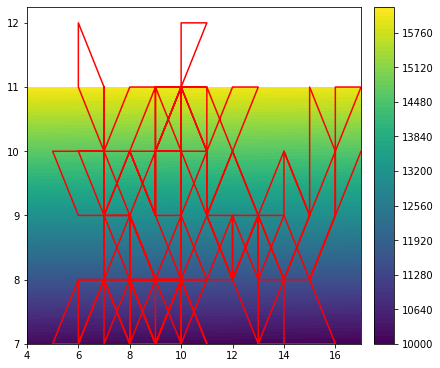

In [264]:
random.seed(0)
simulated_annealing(𝜶=0.3, ε=0.001)

(391, 7, 14, 20693.750099999997)

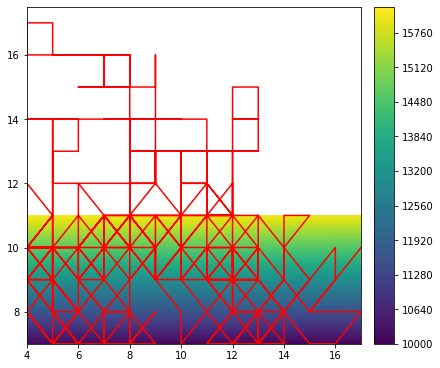

In [265]:
random.seed(0)
simulated_annealing(𝜶=0.5, ε=0.001)

(1129, 10, 10, 14608.7835)

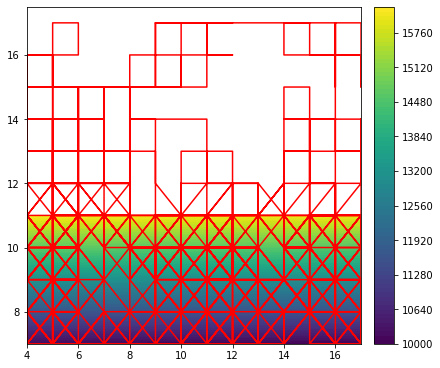

In [266]:
random.seed(0)
simulated_annealing(𝜶=0.7, ε=0.001)

(9877, 7, 8, 11604.378299999998)

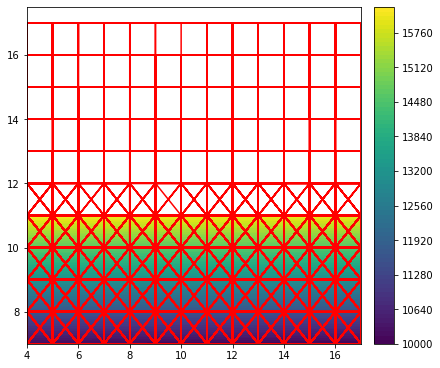

In [267]:
random.seed(0)
simulated_annealing(𝜶=0.9, ε=0.001)

#### Medium Sized Neighbourhood (K=10), Vary Cooling Coefficient (ɑ=0.3...0.9)

(191, 16, 10, 14558.0127)

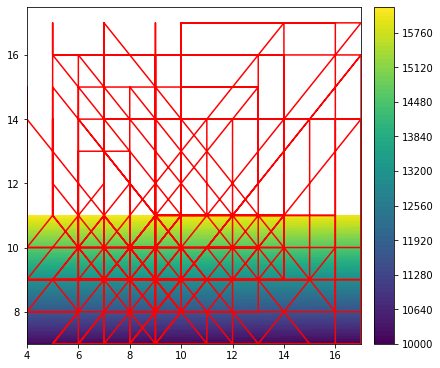

In [268]:
random.seed(0)
simulated_annealing(𝜶=0.3, ε=0.001, K=10)

(397, 10, 17, 25213.0506)

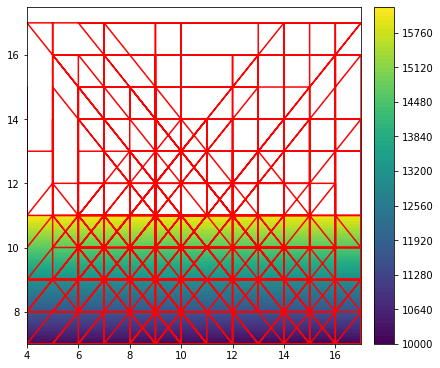

In [269]:
random.seed(0)
simulated_annealing(𝜶=0.5, ε=0.001, K=10)

(1135, 14, 7, 10030.250399999999)

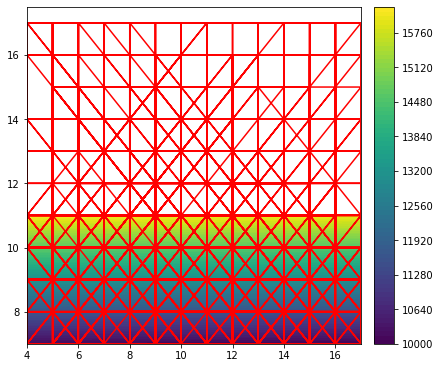

In [270]:
random.seed(0)
simulated_annealing(𝜶=0.7, ε=0.001, K=10)

(9907, 11, 14, 20659.902899999997)

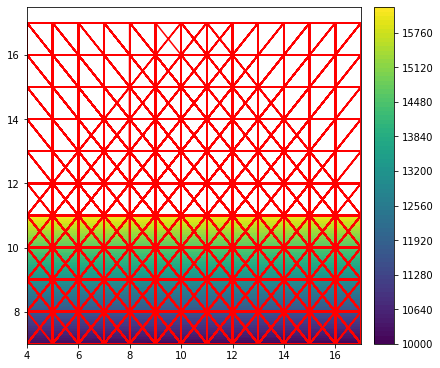

In [271]:
random.seed(0)
simulated_annealing(𝜶=0.9, ε=0.001, K=10)

### Fixed Cooling Coefficient (ɑ=0.9)

#### Small Neighbourhood (K=1), Vary Random Seeds

(9880, 12, 7, 10047.173999999999)

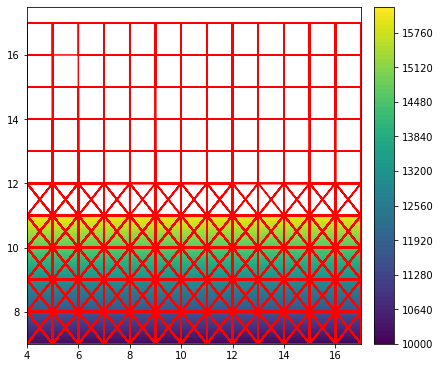

In [272]:
random.seed(413)
simulated_annealing(𝜶=0.9, ε=0.001)

(9851, 6, 10, 14642.6307)

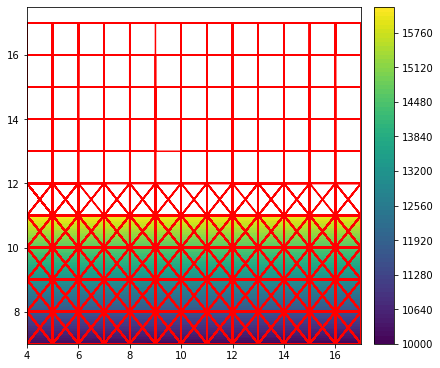

In [273]:
random.seed(41)
simulated_annealing(𝜶=0.9, ε=0.001)

(9877, 13, 7, 10038.7122)

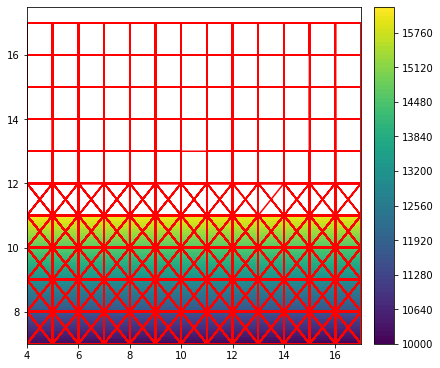

In [274]:
random.seed(42)
simulated_annealing(𝜶=0.9, ε=0.001)

#### Medium Neighbourhood (K=10), Vary Random Seeds

(9886, 15, 12, 17596.265099999997)

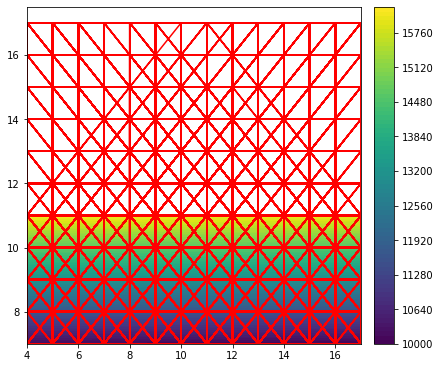

In [275]:
random.seed(413)
simulated_annealing(𝜶=0.9, ε=0.001, K=10)

(9877, 4, 7, 10114.8684)

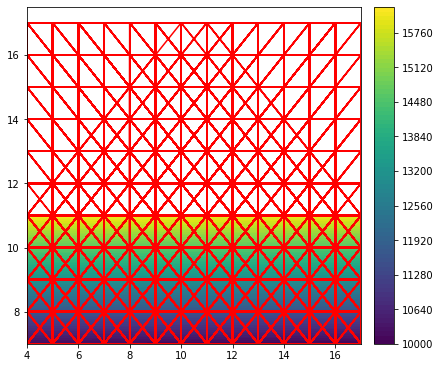

In [276]:
random.seed(41)
simulated_annealing(𝜶=0.9, ε=0.001, K=10)

(9921, 10, 8, 11578.9929)

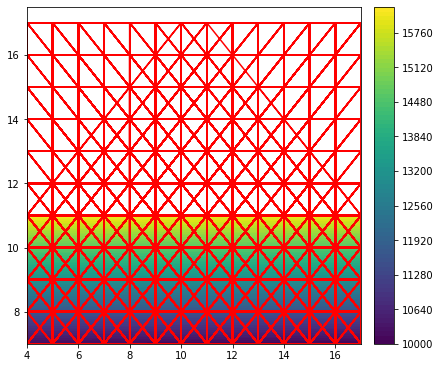

In [277]:
random.seed(42)
simulated_annealing(𝜶=0.9, ε=0.001, K=10)

## Results

<font size="3"> By conducting experiments by varying the seeds, neighbour and cooling coefficients different optimal solutions are obtained. Out of different experiments __random.seed(0) and simulated_annealing(𝜶=0.7, ε=0.001)__ gives best solution of __(10, 10, 14608.7835)__. It is also closest to the actual data points of (10, 10, 15030). The next best solution is __simulated_annealing(𝜶=0.9, ε=0.001)__ which provides solution of __(7, 8, 11604.378299999998)__ which is also closest to the actual data of (7, 8, 11979). So fixed seed with the small neighbourhood has effectively predicted the results close to the actual results.</font>

## Conclsuion

<font size="3">Comparing the result of Linear Programming (LP) model and Simulated Annealing (SA). SA provides a better feasible solution compared to LP that provided the solution of (4, 11, 16174). From this, we can conclude that SA is the best optimization method for maximizing the number of passengers.</font>

## References

[1] https://simpy.readthedocs.io/en/latest/api_reference/simpy.resources.html

[2] https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.poisson.html

[3] https://pythonhosted.org/pyswarm/

[4] The idea of simulation from London underground problem and optimization from monte-Carlo, simulated annealing and greedy hill-climbing, linear programming was inspired by class notes of Professor Ade Fajemisin.